In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

In [5]:
coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.414988,1.461297,-2.262141,-1.029095
versicolor,0.416640,-1.600833,0.577658,-1.385538
virginica,-1.707525,-1.534268,2.470972,2.555382


In [6]:
from sklearn.preprocessing import StandardScaler
X_norm =  StandardScaler().fit_transform(X)

model = model.fit(X_norm, y)

coeffs1 = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs1

model2 = LogisticRegression(penalty = 'l1')
model2.fit(X_norm, y)

coeffs2 = pd.DataFrame(model2.coef_, columns = iris.feature_names, index = iris.target_names)
coeffs2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.000000,1.197828,-4.428187,0.000000
versicolor,0.029988,-1.239957,0.760925,-0.768317
virginica,0.000000,-0.480533,2.716444,4.579731


In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

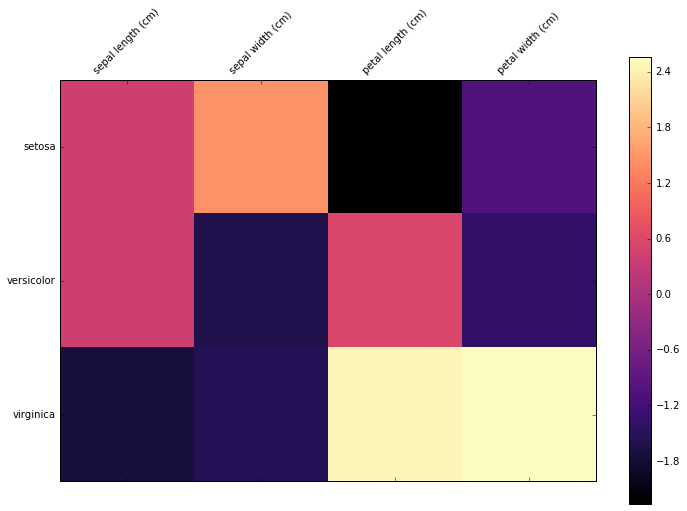

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(coeffs, cmap = 'magma')

fig.colorbar(cax)

ax.set_xticklabels(['']+list(coeffs.columns), rotation = 45);
ax.set_yticklabels(['']+list(coeffs.index));

plt.show()